# How does follower count, retweets, and state of origin influence overall engagement?(number of likes)


## Introduction

## Data Cleaning

In [30]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df = pd.read_csv('hashtag_donaldtrump.csv', lineterminator='\n')

In [3]:
df.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


In [4]:

df_final = df.sample(frac = 0.10)
df_final.shape

(97092, 21)

In [6]:
df_final.isnull().any(axis = 0)

created_at              False
tweet_id                False
tweet                   False
likes                   False
retweet_count           False
source                   True
user_id                 False
user_name                True
user_screen_name        False
user_description         True
user_join_date          False
user_followers_count    False
user_location            True
lat                      True
long                     True
city                     True
country                  True
continent                True
state                    True
state_code               True
collected_at            False
dtype: bool

In [5]:
df_final.duplicated().sum()

0

In [6]:

df_cleaned = df_final.dropna()
df_cleaned.shape

(18785, 21)

## Summary statistics

In [41]:
# y variable stats
likes_summary = df_cleaned['likes'].describe()
likes_summary

count    18785.000000
mean        11.177109
std        191.985022
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max      17009.000000
Name: likes, dtype: float64

Interpretation of likes summary table:
based on the interquartile range, 50% data points for number of likes are between 0-2. This is in stark contrast to the mean which is much higher at 11.177. The most striking is that the standard deviation is 191 which is more than 10 times bigger than the mean itself. Such a massive standard deviation given our mean and interquartile range implies the presence of extreme outliers, which are severely skewing the data. Based on our max value, it is clear that there is a massive right skew in our likes distribution. this is interesting as it implies that a very small number of posts produce a disproportionately high number of likes from a likes share point of view.

In [45]:
#x1 variable (follower count)
follower_summary = df_cleaned['user_followers_count'].describe()
follower_summary

count    1.878500e+04
mean     3.134652e+04
std      2.581124e+05
min      0.000000e+00
25%      1.960000e+02
50%      8.970000e+02
75%      3.324000e+03
max      1.320599e+07
Name: user_followers_count, dtype: float64

Interpretation of follower summary table
the interquartile range suggests that 50% of all values fall within 196 to 3,324 followers. The mean follower count is 31,346 with the standard deviation being 258,112. This implies that like the previous summary, there are outliers that lead to a large standard deviation and mean, despite most values being within 196 and 3,324. Like before, there is a big right skew implying that there are a few accounts in the dataset that have a disproportionately high share of followers. 

In [46]:
#x2  variable (retweet count)
retweet_summary = df_cleaned['retweet_count'].describe()
retweet_summary

count    18785.000000
mean         2.683524
std         52.618913
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       5135.000000
Name: retweet_count, dtype: float64

interpretation of retweet summary table

To conclude from our summary statistics, It is clear that we have to look at the small number of highly influential data points as oppoed to the majority number of non-influential data points. We can also even out the skewed distributions using a log scale and make interpretations on that basis. 

(0.0, 3000000.0)

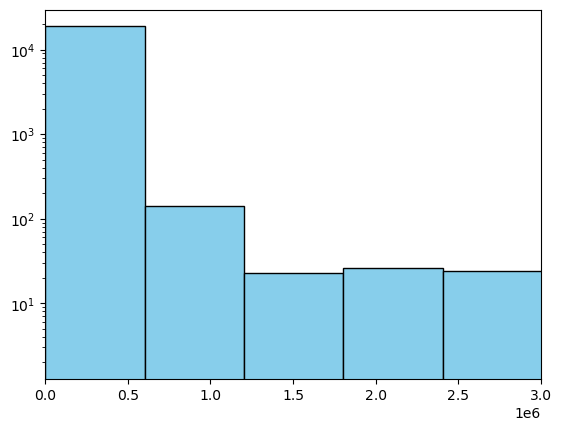

In [44]:
#histogram of followers count
plt.hist(df_cleaned['user_followers_count'],log = True, bins = 20, edgecolor = 'black', color = 'skyblue')
plt.xlim([0,3000000])
#if we used linear scale, there would be only one bar (follower count between 0 to 5 500,000 followers).
# log scale spreads the distribution out

(0.0, 10000.0)

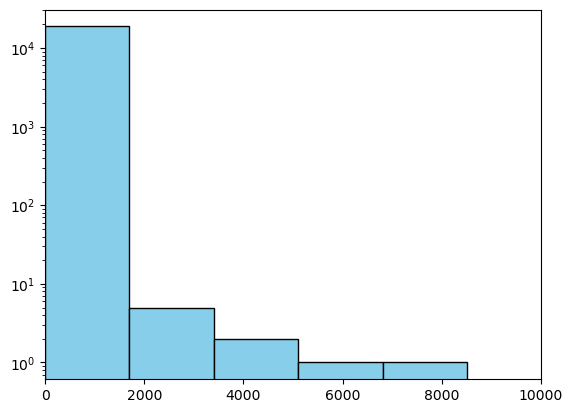

In [43]:
#histogram of likes count
plt.hist(df_cleaned['likes'],log= True, edgecolor = 'black', color = 'skyblue')
plt.xlim([0,10000])
#used log-scale again for similar purposes.


<Axes: >

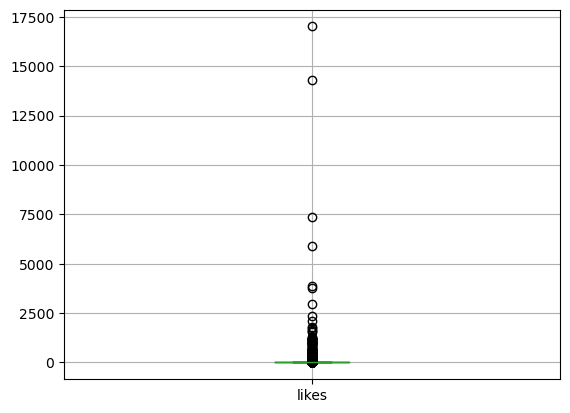

In [44]:
df_cleaned.boxplot(column = 'likes')

In [20]:
#limiting state values to top 10
state_freq = df_cleaned['state'].value_counts()
sorted_series = state_freq.sort_values(ascending = False)
sorted_series.head(10)

state
New York                1892
California              1883
England                 1625
District of Columbia     939
Ile-de-France            867
Texas                    757
Florida                  667
Ontario                  525
Illinois                 444
Berlin                   386
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'New York'),
  Text(1, 0, 'California'),
  Text(2, 0, 'England'),
  Text(3, 0, 'District of Columbia'),
  Text(4, 0, 'Ile-de-France'),
  Text(5, 0, 'Texas'),
  Text(6, 0, 'Florida'),
  Text(7, 0, 'Ontario'),
  Text(8, 0, 'Illinois'),
  Text(9, 0, 'Berlin')])

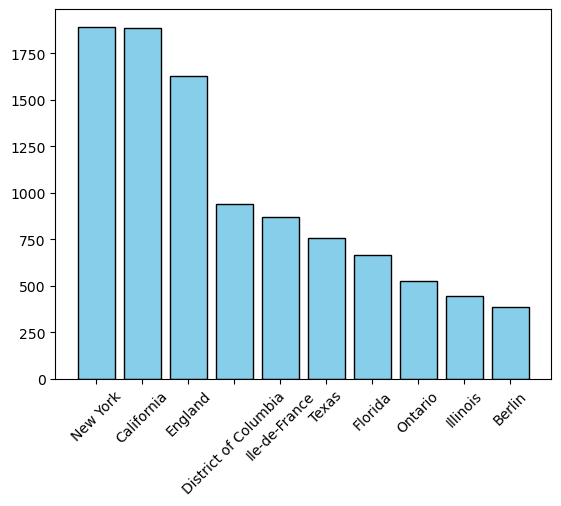

In [23]:
#barplot for state
desired_values = ['New York','California','England','District of Columbia','Ile-de-France','Texas','Florida','Ontario','Illinois','Berlin']
plt.bar(desired_values,height = sorted_series.head(10),edgecolor = 'black', color = 'skyblue' )
plt.xticks(rotation=45)

(array([1.8775e+04, 7.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0. ,  513.5, 1027. , 1540.5, 2054. , 2567.5, 3081. , 3594.5,
        4108. , 4621.5, 5135. ]),
 <BarContainer object of 10 artists>)

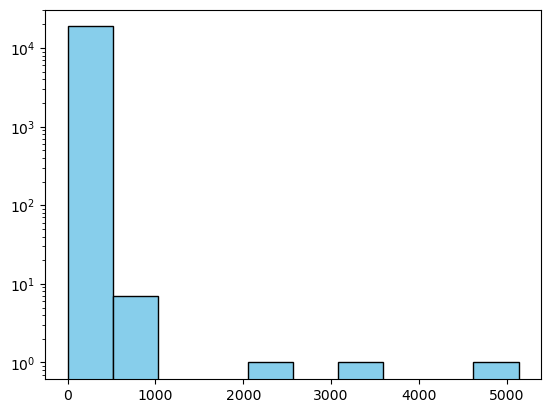

In [27]:
plt.hist(df_cleaned['retweet_count'], log = True, edgecolor = 'black', color = 'skyblue')


In [37]:
df_cleaned['created_at'] = pd.to_datetime(df_cleaned['created_at'])
df_cleaned['month-year'] = df_cleaned['created_at'].dt.strftime('%B-%Y')
df_cleaned['month-year'].value_counts()




C:\Users\User\AppData\Local\Temp\ipykernel_840\1194519649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['created_at'] = pd.to_datetime(df_cleaned['created_at'])
C:\Users\User\AppData\Local\Temp\ipykernel_840\1194519649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['month-year'] = df_cleaned['created_at'].dt.strftime('%B-%Y')


month-year
November-2020    10538
October-2020      8247
Name: count, dtype: int64